In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.math import confusion_matrix
from google.colab import files



MINST a large dataset of handwritten digits that contains 70,000 grayscale images of handwritten digits from 0 to 9, each of size 28x28 pixels. The dataset is split into a training set of 60,000 images and a test set of 10,000 images:

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [3]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Size of the images are 28 by 28 pixels with one channel corresponding to grey

In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

The values correspond to the intensity of the greyscale color in the image and range from 0 to 255. For increase the efficiency of the NN, the values need to be scaled:

In [5]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255
### Add a chanel which is mandatory for CNN
x_test_scaled = np.expand_dims(x_test_scaled, -1)
x_train_scaled = np.expand_dims(x_train_scaled, -1)

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Depending of the loss function will use in the NN, we can leave the target as such or use one hot encoding:
* categorical_crossentropy : One-hot encoding   
* sparse_categorical_crossentropy : Numerical values

Let's check the scaled images:

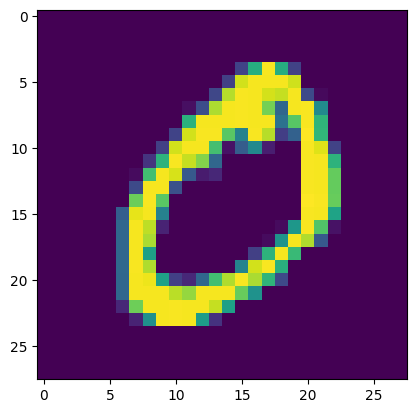

In [7]:
plt.imshow(x_train_scaled[1])
plt.show()

## Simple Neural Network vs Convolutional Neural Network


In [8]:
input_shape =(28,28,1)
num_classe = 10
NN = keras.Sequential([keras.Input(shape=input_shape),
                          keras.layers.Flatten(),
                          keras.layers.Dense(100,activation="relu"),
                          keras.layers.BatchNormalization(),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(80,activation="relu"),
                          keras.layers.BatchNormalization(),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(50,activation="relu"),
                          keras.layers.Dense(num_classe,activation="softmax")
])
NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 80)                8080      
                                                                 
 batch_normalization_1 (Bat  (None, 80)                320       
 chNormalization)                                       

In [9]:
NN.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
    )



In [10]:
history_NN = NN.fit(x_train_scaled,y_train,epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 18s 6ms/step - loss: 0.6680 - accuracy: 0.7884 - val_loss: 0.1728 - val_accuracy: 0.9467
Epoch 2/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3869 - accuracy: 0.8845 - val_loss: 0.1375 - val_accuracy: 0.9573
Epoch 3/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3346 - accuracy: 0.9003 - val_loss: 0.1183 - val_accuracy: 0.9663
Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3016 - accuracy: 0.9118 - val_loss: 0.1132 - val_accuracy: 0.9658
Epoch 5/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2746 - accuracy: 0.9185 - val_loss: 0.1064 - val_accuracy: 0.9683
Epoch 6/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2580 - accuracy: 0.9230 - val_loss: 0.0988 - val_accuracy: 0.9690
Epoch 7/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2450 - accuracy: 0.9277 - val_loss: 0.0877 - val_acc

In [11]:
loss_NN, accuracy_NN = NN.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1043 - accuracy: 0.9696


In [12]:
input_shape =(28,28,1)
num_classe = 10
CNN = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(3, 3)),
        keras.layers.Flatten(),
        keras.layers.Dense(128,activation="relu"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classe, activation="softmax"),
    ]
)
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 64)          0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               524416    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                      

In [13]:
CNN.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
    )

In [14]:
history_CNN = CNN.fit(x_train_scaled,
                      y_train,epochs=10,
                      batch_size=32,
                      )

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.1859 - accuracy: 0.9436
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0732 - accuracy: 0.9781
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0545 - accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0447 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0371 - accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0341 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0276 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0247 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0225 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.02

In [15]:
loss_CNN, accuracy_CNN = CNN.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0302 - accuracy: 0.9922


In [28]:
CNN.save("models/CNN_digit.h5")
files.download('models/CNN_digit.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
print(f'Accuracy on unseen data for CNN : {accuracy_CNN}; for simple NN: {accuracy_NN}')

Accuracy on unseen data for CNN : 0.9922000169754028; for simple NN: 0.9696000218391418


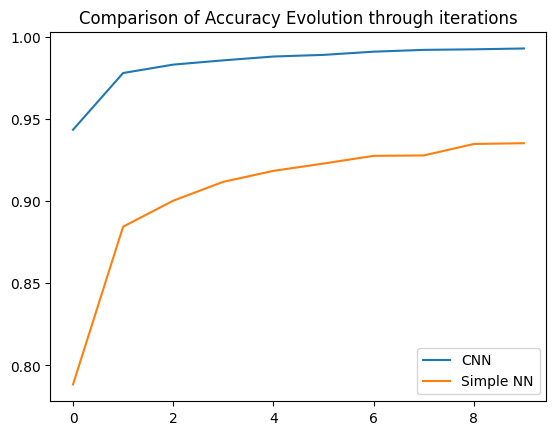

In [18]:
plt.plot(history_CNN.history["accuracy"],label="CNN")
plt.plot(history_NN.history["accuracy"],label="Simple NN")
plt.title("Comparison of Accuracy Evolution through iterations")
plt.legend()

In [29]:
NN.save("models/NN_digit.h5")
files.download('models/NN_digit.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>